# Netflix Data Analysis

### Problem Statement
Netflix is known for it's work in data science, AI, and ML, particularly for building strong recommendation models and algorithms that understand customer behaviour and patterns.Suppose you are working in a data-driven job role, and you have a dataset of more than 9,0000 movies. You need to solve the following questions to help the company make informed business descision accordingly.
1. What is the most frequent genre of movies released on Netflix?
2. What genres has highest votes?
3. What movies got the loewst popularity? What's its genre?
4. What movies got the highest popularity? What's its genre?
5. Which year has the most filmmed movies?

### Dataset Information:

- **Release_Date**: Releasing date of movie
- **Title**: Name of the movie
- **Overview**: Description of the movie
- **Popularity**: Popularity of the movie
- **Vote_Count**: No of votes for the movie
- **Vote_Average**: Average vote of the movie
- **Original_Language**: Movie Language
- **Genre**: Type of movie
- **Poster_Url**: Movie image urlom

### 1. Import required libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### 2. Load the dataset

In [2]:
df = pd.read_csv('movie.csv')
df.head()

,Release_Date,Title,Overview,Popularity,Vote_Count,Vote_Average,Original_Language,Genre,Poster_Url
0,12/15/2021,Spider-Man: No Way Home,Peter Parker is unmasked and no longer able to...,5083.954,8940,8.3,en,"Action, Adventure, Science Fiction",https://image.tmdb.org/t/p/original/1g0dhYtq4i...
1,3/1/2022,The Batman,"In his second year of fighting crime, Batman u...",3827.658,1151,8.1,en,"Crime, Mystery, Thriller",https://image.tmdb.org/t/p/original/74xTEgt7R3...
2,2/25/2022,No Exit,Stranded at a rest stop in the mountains durin...,2618.087,122,6.3,en,Thriller,https://image.tmdb.org/t/p/original/vDHsLnOWKl...
3,11/24/2021,Encanto,"The tale of an extraordinary family, the Madri...",2402.201,5076,7.7,en,"Animation, Comedy, Family, Fantasy",https://image.tmdb.org/t/p/original/4j0PNHkMr5...
4,12/22/2021,The King's Man,As a collection of history's worst tyrants and...,1895.511,1793,7,en,"Action, Adventure, Thriller, War",https://image.tmdb.org/t/p/original/aq4Pwv5Xeu...


### 3. Check the shape and basic information of the dataset.

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9837 entries, 0 to 9836
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Release_Date       9837 non-null   object 
 1   Title              9828 non-null   object 
 2   Overview           9828 non-null   object 
 3   Popularity         9827 non-null   float64
 4   Vote_Count         9827 non-null   object 
 5   Vote_Average       9827 non-null   object 
 6   Original_Language  9827 non-null   object 
 7   Genre              9826 non-null   object 
 8   Poster_Url         9826 non-null   object 
dtypes: float64(1), object(8)
memory usage: 691.8+ KB


In [4]:
df.shape

(9837, 9)

- The data has 9837 records with 9 columns.
- Out of 9 columns, 8 are string/object type and 1 is of float type.
- Popularity column is of float type.
- Except Release_Date column all columns have some missing values.
- Release_Date column contains date, so the type should be the datetime not object.
- Vote_Count and Vote_Average is containing numeric value so type should be int and float respectively.
- Genre coulmn is multi valued, we have to separate every genre values.

In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Popularity,9827.0,40.32057,108.874308,7.1,16.1275,21.191,35.1745,5083.954


In [6]:
df.describe(include= 'O')

,Release_Date,Title,Overview,Vote_Count,Vote_Average,Original_Language,Genre,Poster_Url
count,9837,9828,9828,9827,9827,9827,9826,9826
unique,5903,9514,9823,3267,75,44,2337,9826
top,3/10/2022,Beauty and the Beast,Dr. Raichi is one of the only survivors of the...,0,6.4,en,Drama,https://image.tmdb.org/t/p/original/1g0dhYtq4i...
freq,16,4,2,100,435,7569,466,1


In [7]:
df[df['Title'] == 'Beauty and the Beast']

,Release_Date,Title,Overview,Popularity,Vote_Count,Vote_Average,Original_Language,Genre,Poster_Url
467,10/22/1991,Beauty and the Beast,"Follow the adventures of Belle, a bright young...",109.649,8280,7.7,en,"Romance, Family, Animation, Fantasy",https://image.tmdb.org/t/p/original/7oCAPOphDK...
506,3/16/2017,Beauty and the Beast,A live-action adaptation of Disney's version o...,104.094,13992,7,en,"Family, Fantasy, Romance",https://image.tmdb.org/t/p/original/hKegSKIDep...
3006,2/12/2014,Beauty and the Beast,Beauty and the Beast is the adaptation of a st...,30.170,1763,6.1,fr,"Fantasy, Romance",https://image.tmdb.org/t/p/original/8bErT2koHX...
5771,10/29/1946,Beauty and the Beast,The story of a gentle-hearted beast in love wi...,19.024,449,7.5,fr,"Drama, Fantasy, Romance",https://image.tmdb.org/t/p/original/8asbxUhxKA...


#### There is some movies with the same name but that is not as duplicates. That has different languages, overview and release_date.

In [8]:
df.duplicated().sum()

0

#### There is no duplicate values

In [9]:
df.isna().sum()

Release_Date          0
Title                 9
Overview              9
Popularity           10
Vote_Count           10
Vote_Average         10
Original_Language    10
Genre                11
Poster_Url           11
dtype: int64

#### We can clearly see that there is some missing values in the data. 

- Checking % of missing values 

In [10]:
df.isna().sum() / len(df) * 100

Release_Date         0.000000
Title                0.091491
Overview             0.091491
Popularity           0.101657
Vote_Count           0.101657
Vote_Average         0.101657
Original_Language    0.101657
Genre                0.111823
Poster_Url           0.111823
dtype: float64

- There is a very small percentage(< 1%) of missing values, so we can drop them. It will not cause any negative effect.

In [11]:
df = df.dropna()

In [12]:
df.isna().sum()

Release_Date         0
Title                0
Overview             0
Popularity           0
Vote_Count           0
Vote_Average         0
Original_Language    0
Genre                0
Poster_Url           0
dtype: int64

In [13]:
df['Vote_Count'] = pd.to_numeric(df['Vote_Count'], errors='coerce').astype('Int64')
df['Vote_Average'] = pd.to_numeric(df['Vote_Average'], errors='coerce')

In [14]:
df['Release_Date'] = pd.to_datetime(df['Release_Date'], errors='coerce')

In [15]:
df['Release_Date'] = df['Release_Date'].dt.year.astype('Int64')

In [16]:
df.rename(columns = {'Release_Date': 'Release_Year'}, inplace=True)

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9826 entries, 0 to 9836
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Release_Year       9826 non-null   Int64  
 1   Title              9826 non-null   object 
 2   Overview           9826 non-null   object 
 3   Popularity         9826 non-null   float64
 4   Vote_Count         9826 non-null   Int64  
 5   Vote_Average       9826 non-null   float64
 6   Original_Language  9826 non-null   object 
 7   Genre              9826 non-null   object 
 8   Poster_Url         9826 non-null   object 
dtypes: Int64(2), float64(2), object(5)
memory usage: 786.8+ KB


In [18]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Release_Year,9826.0,2006.202931,15.686202,1902.0,2000.0,2011.0,2017.0,2024.0
Popularity,9826.0,40.323951,108.879332,13.354,16.12825,21.195,35.17925,5083.954
Vote_Count,9826.0,1392.943721,2611.303856,0.0,146.0,444.0,1376.0,31077.0
Vote_Average,9826.0,6.439467,1.129797,0.0,5.9,6.5,7.1,10.0


### after droping missing values
- we have a dataframe consisting of 9826 rows and 9 columns.
- our dataset looks a bit tidy with no NaNs nor duplicated values.
- Release_Date column casted into date time and to extract only the year.
- Overview, Original_Language and Poster-Url wouldn't be so useful during analysis so, i will drop them.
- there is noticable outliers in Popularity column.
- Genre column has comma separated values and white spaces that needs to be handled.

### Dropping the unnecessary column.

In [19]:
col_to_drop = ['Overview', 'Original_Language', 'Poster_Url']
df.drop(col_to_drop, axis= 1, inplace = True)

In [20]:
df.head()

,Release_Year,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,8.3,"Action, Adventure, Science Fiction"
1,2022,The Batman,3827.658,1151,8.1,"Crime, Mystery, Thriller"
2,2022,No Exit,2618.087,122,6.3,Thriller
3,2021,Encanto,2402.201,5076,7.7,"Animation, Comedy, Family, Fantasy"
4,2021,The King's Man,1895.511,1793,7.0,"Action, Adventure, Thriller, War"


### categorizing Vote_Average column
- We will categorize the Vote_Average values into 4 categories: popular, average, below_avg, not_popular. To categorize this i am creating a function called categorize_by_quartiles().
- I am using quartile-based categorization to segment the movies based on their average ratings in a way that reflects the distribution of the data. This method ensures that each category contains roughly the same number of movies, which helps avoid imbalanced classes and gives a more balanced perspective when comparing 'not_popular', 'below_avg', 'average', or 'popular' movies. It's especially useful when the ratings are not evenly distributed, which is often the case in real-world movie data where many ratings cluster around the middle."

In [21]:
def categorize_by_quartiles(df, col, labels):
    edges = [
        df[col].min(),
        df[col].quantile(0.25),
        df[col].quantile(0.50),
        df[col].quantile(0.75),
        df[col].max()
    ]

    edges = sorted(set(edges))
    
    num_bins = len(edges) - 1
    used_labels = labels[:num_bins]

    df[col] = pd.cut(
        df[col],
        bins=edges,
        labels=used_labels,
        include_lowest=True
    )

    return df

In [22]:
labels = ['not_popular', 'below_avg', 'average', 'popular']
df = categorize_by_quartiles(df, 'Vote_Average', labels)

In [23]:
df['Vote_Average'].value_counts()

Vote_Average
not_popular    2567
popular        2450
average        2411
below_avg      2398
Name: count, dtype: int64

In [24]:
df.head(3)

,Release_Year,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,popular,"Action, Adventure, Science Fiction"
1,2022,The Batman,3827.658,1151,popular,"Crime, Mystery, Thriller"
2,2022,No Exit,2618.087,122,below_avg,Thriller


### we'd split genres into a list and then explode our dataframe to have only one genre per row for each movie

In [25]:
df['Genre'] = df['Genre'].str.split(', ')
genre_exploded_df = df.explode('Genre').reset_index(drop = True)

genre_exploded_df.head()

,Release_Year,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,popular,Action
1,2021,Spider-Man: No Way Home,5083.954,8940,popular,Adventure
2,2021,Spider-Man: No Way Home,5083.954,8940,popular,Science Fiction
3,2022,The Batman,3827.658,1151,popular,Crime
4,2022,The Batman,3827.658,1151,popular,Mystery


In [26]:
genre_exploded_df.nunique()

Release_Year     102
Title           9512
Popularity      8159
Vote_Count      3266
Vote_Average       4
Genre             19
dtype: int64

In [27]:
genre_exploded_df.shape

(25792, 6)

#### Now that our dataset is clean and tidy, we are left with a total of 6 columns and 25792 rows to dig into during our analysis

### Data Visualization

In [28]:
sns.set_style('whitegrid')

#### Q1: What is the most frequent genre in the dataset?

In [29]:
genre_exploded_df['Genre'].value_counts()

Genre
Drama              3744
Comedy             3031
Action             2686
Thriller           2488
Adventure          1853
Romance            1476
Horror             1470
Animation          1438
Family             1414
Fantasy            1308
Science Fiction    1273
Crime              1242
Mystery             773
History             427
War                 308
Music               295
Documentary         215
TV Movie            214
Western             137
Name: count, dtype: int64

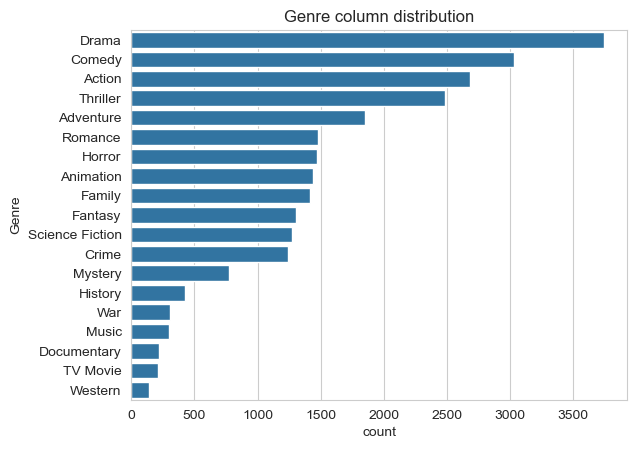

In [30]:
sns.countplot(y = 'Genre', data = genre_exploded_df, order = genre_exploded_df['Genre'].value_counts().index)
plt.title('Genre column distribution')
plt.show()

- we can notice from the above visual that Drama genre is the most frequent genre in our dataset. It has 3744 movies. western is the least frequent genre.

#### Q2. What genres has highest votes?

In [31]:
vote_counts = genre_exploded_df.groupby('Genre')['Vote_Count'].sum().sort_values(ascending = False)
vote_counts

Genre
Drama              5141495
Action             4868675
Adventure          4313869
Comedy             3933497
Thriller           3631594
Science Fiction    2850476
Fantasy            2521940
Family             2046625
Crime              1980261
Romance            1803756
Animation          1525010
Horror             1448486
Mystery            1181275
History             527056
War                 448918
Music               297446
Western             186860
TV Movie             68441
Documentary          38224
Name: Vote_Count, dtype: Int64

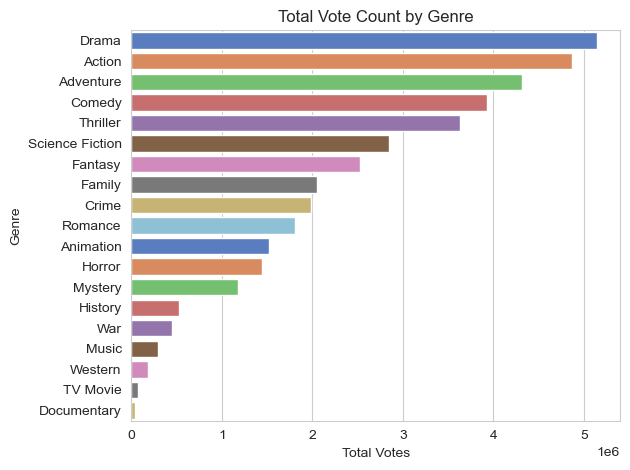

In [32]:
genre_votes_df = vote_counts.reset_index()

sns.barplot(data=genre_votes_df, x='Vote_Count', y='Genre', hue = 'Genre', palette= 'muted', legend = False)

plt.title('Total Vote Count by Genre')
plt.xlabel('Total Votes')
plt.ylabel('Genre')
plt.tight_layout()
plt.show()

- Drama has the highest vote count with 5141495 votes.

#### Q3. What movies got the lowest popularity? What's its genre?

In [33]:
df[df['Popularity'] == df['Popularity'].min()]

,Release_Year,Title,Popularity,Vote_Count,Vote_Average,Genre
9835,2021,The United States vs. Billie Holiday,13.354,152,average,"[Music, Drama, History]"
9836,1984,Threads,13.354,186,popular,"[War, Drama, Science Fiction]"


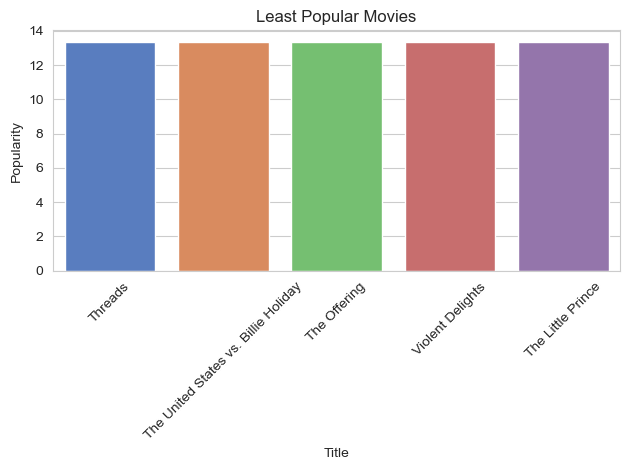

In [34]:
top_n = df.sort_values('Popularity', ascending=True).head(5).reset_index()
sns.barplot(data=top_n, x='Title', y='Popularity', hue = 'Title', palette='muted')

# plt.figure(figsize=(10, 6))
plt.title('Least Popular Movies')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

- The United States vs. Billie Holiday and threads got the lowest popularity rate in our dataset and it has genres of music , drama , 'war', 'sci-fi' and history.

#### Q4. What movies got the highest popularity? What's its genre?

In [35]:
df[df['Popularity'] == df['Popularity'].max()]

,Release_Year,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,popular,"[Action, Adventure, Science Fiction]"


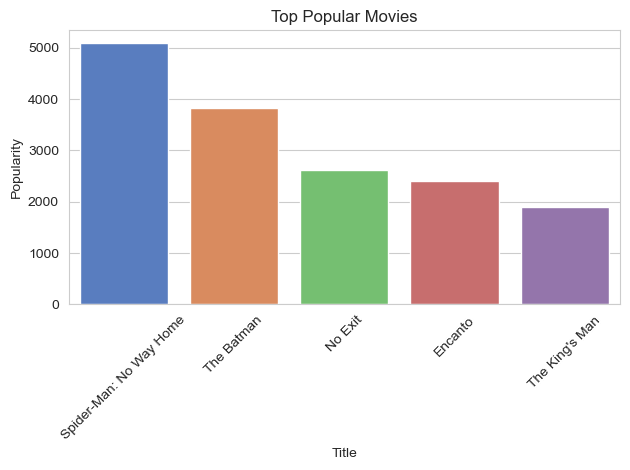

In [36]:
top_n = df.sort_values('Popularity', ascending=False).head(5).reset_index()
sns.barplot(data=top_n, x='Title', y='Popularity', hue = 'Title', palette='muted')

plt.title('Top Popular Movies')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

- Spider-Man: No Way Home got the highest popularity rate. It has genre of Action, Adventure, and Science Fiction

#### Q5. Which year has the most filmmed movies?

In [37]:
movie_counts_by_year = df['Release_Year'].value_counts().sort_values(ascending = False)
movie_counts_by_year

Release_Year
2021    714
2018    530
2017    510
2019    500
2016    470
       ... 
1902      1
1920      1
2024      1
1929      1
1930      1
Name: count, Length: 102, dtype: Int64

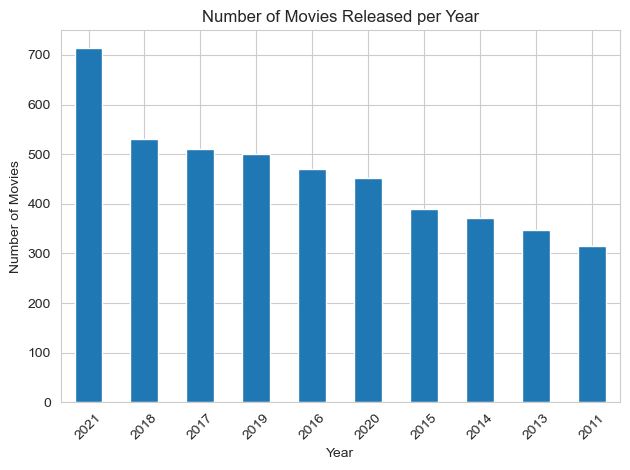

In [38]:
movie_counts_by_year.head(10).plot(kind='bar')

plt.title('Number of Movies Released per Year')
plt.xlabel('Year')
plt.ylabel('Number of Movies')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

- Year 2021 has the most released movies, this year 714 movie was released.

## Conclusion

#### Q1: What is the most frequent genre in the dataset?
- Drama is the most frequent genre in the dataset. It has 3744 movies.

#### Q2. What genres has highest votes?
- Drama has the highest vote count with 5141495 votes.

#### Q3. What movies got the lowest popularity? What's its genre?
- The United States vs. Billie Holiday and threads got the lowest popularity rate in our dataset and it has genres of music , drama , war, sci-fi and history.

#### Q4. What movies got the highest popularity? What's its genre?
- Spider-Man: No Way Home got the highest popularity rate. It has genre of Action, Adventure, and Science Fiction

#### Q5. Which year has the most filmmed movies?
- Year 2021 has the most released movies, this year 714 movie was released.